In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

1. Load Dataset

In [ ]:
df = pd.read_csv("onlinefoods.csv")
df.head()

2. Handle Missing Values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

missing_values_after = df.isnull().sum()
print("\nMissing Values after handling:\n", missing_values_after)


3. Encode Categorial Variables

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df.head())

4. Feature Selection

In [ ]:
print("Summary Statistics:\n", df.describe())
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print("\nCorrelation Matrix:\n", numeric_df.corr())

sns.pairplot(df, hue='Output')
plt.show()

selected_features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']

df_selected = df[selected_features]

print("Selected Features:\n", df_selected.head())

Part 2 : EDA


1. Descriptive Statistics

In [ ]:
numeric_summary = df.describe()

print("Descriptive Statistics for Numeric Columns:\n", numeric_summary)

 2. Visualizations

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Feedback', multiple='stack', bins=20)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Monthly Income', hue='Feedback')
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Feedback')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Part 3: Logistic Regression Model


1. Build The Model

In [ ]:
X = df[selected_features]
y = df['Output']

X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_encoded, y_train)

y_pred = logistic_model.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2. Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, pos_label='Yes')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, pos_label='Yes')
print("Recall:", recall)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Part 4: Data Analysis and Visualisation

1. Feauture Importance

In [ ]:
feature_importance = logistic_model.coef_[0]

feature_names = X_encoded.columns

sorted_indices = np.argsort(np.abs(feature_importance))
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


2. Prediction Insights

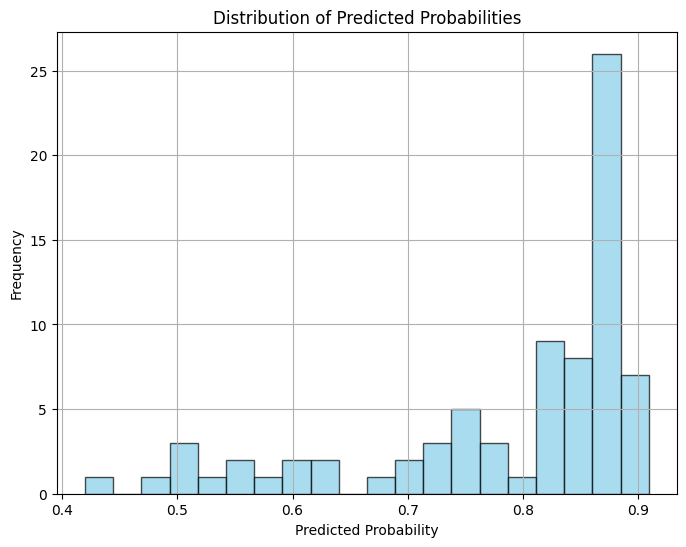

In [58]:
y_pred_proba = logistic_model.predict_proba(X_test_encoded)[:, 1]

plt.figure(figsize=(8, 6))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.grid(True)
plt.show()